In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


# Specify the stock symbol and date range
symbol = "AAPL"

# Calculate the end date as today's date
end_date = (datetime.today()+timedelta(days= 1)).strftime('%Y-%m-%d')

# Calculate the start date as 5 years ago from the end date
start_date = (datetime.today() - timedelta(days=365 * 5 + 1)).strftime('%Y-%m-%d')


# Fetch historical data using yfinance
df = yf.download(symbol, start=start_date, end=end_date)

# Reset the index to make the date a column
df.reset_index(inplace=True)

# Save DataFrame to a CSV file
df.to_csv('historical_data.csv', index=False)

print(end_date)
print(start_date)



[*********************100%%**********************]  1 of 1 completed
2023-12-12
2018-12-12


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-12,42.599998,42.980000,42.255001,42.275002,40.576008,142510800
1,2018-12-13,42.622501,43.142502,42.387501,42.737499,41.019913,127594400
2,2018-12-14,42.250000,42.270000,41.320000,41.369999,39.707371,162814800
3,2018-12-17,41.362499,42.087502,40.682499,40.985001,39.337860,177151600
4,2018-12-18,41.345001,41.882500,41.097500,41.517502,39.848949,135366000
...,...,...,...,...,...,...,...
1253,2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66628400
1254,2023-12-06,194.449997,194.759995,192.110001,192.320007,192.320007,41089700
1255,2023-12-07,193.630005,195.000000,193.589996,194.270004,194.270004,47477700
1256,2023-12-08,194.199997,195.990005,193.669998,195.710007,195.710007,53377300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [ ]:
df1=df.reset_index()['Close']

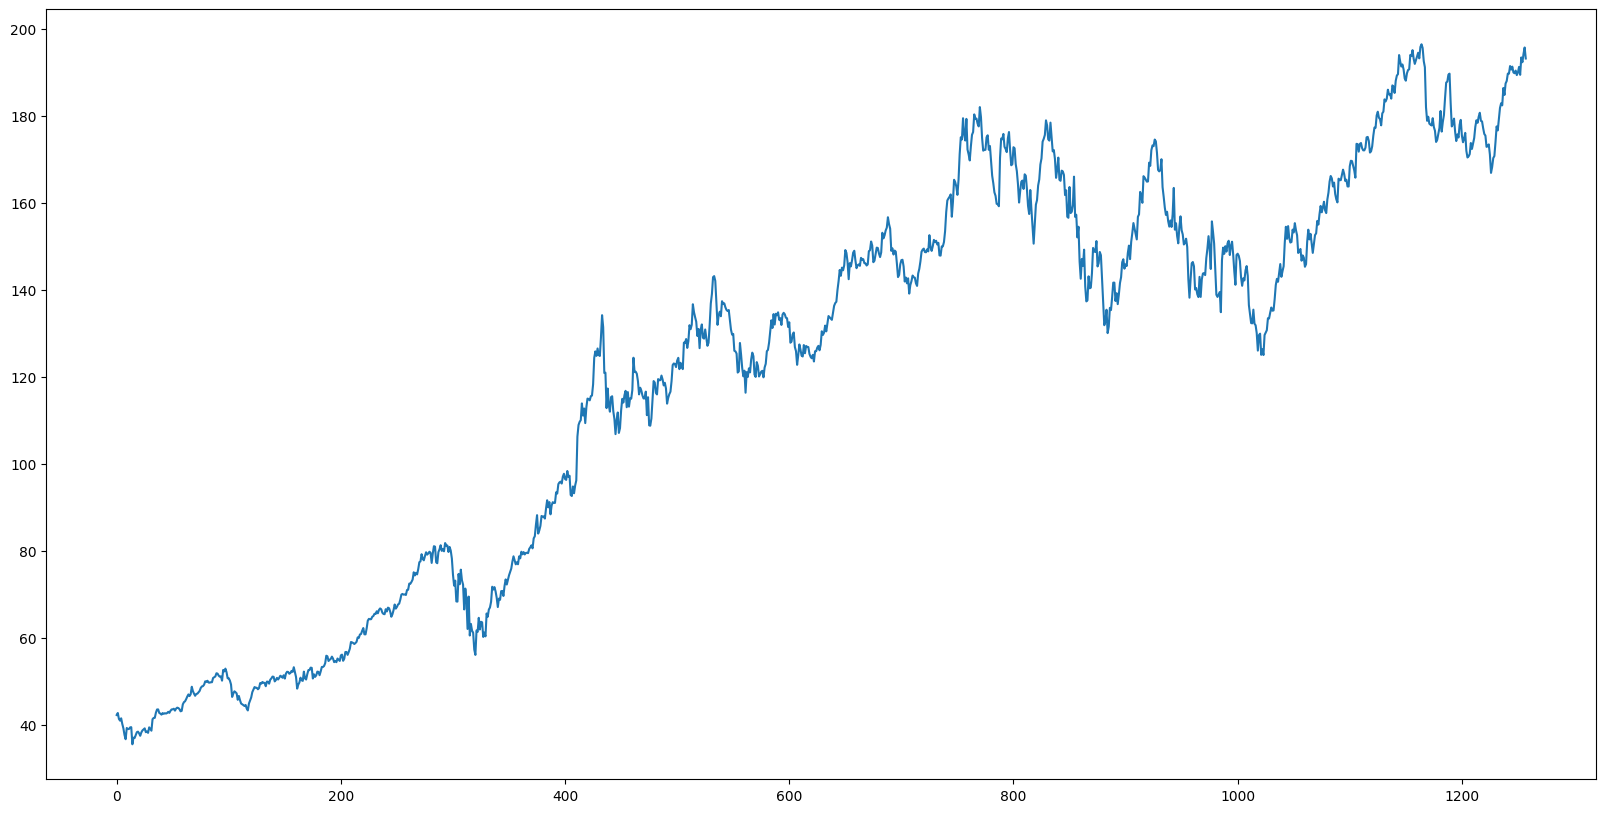

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(817, 441)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 305ms/step - loss: 0.0962 - val_loss: 0.0202
Epoch 2/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0142 - val_loss: 0.0036
Epoch 3/100
12/12 [==============================] - 2s 191ms/step - loss: 0.0056 - val_loss: 0.0145
Epoch 4/100
12/12 [==============================] - 3s 254ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 5/100
12/12 [==============================] - 3s 284ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 6/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 7/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0014 - val_loss: 0.0026
Epoch 8/100
12/12 [==============================] - 2s 188ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 9/100
12/12 [==============================] - 2s 190ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 10/100
12/12 [==============================] - 3s 286ms/step - loss: 0.0014 - val_l

In [ ]:
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11/11 [==============================] - 0s 36ms/step


112.41547981514053

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_test_original = scaler.inverse_transform(ytest.reshape(-1, 1))
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))
mae_train = mean_absolute_error(y_train_original,train_predict)
mse_train = mean_squared_error(y_train_original,train_predict)
rmse_train = np.sqrt(mse_train)

print("Training Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"Root Mean Squared Error (RMSE): {rmse_train}")

# Calculate performance metrics for the validation set
mae_valid = mean_absolute_error(y_test_original, test_predict)
mse_valid = mean_squared_error(y_test_original, test_predict)
rmse_valid = np.sqrt(mse_valid)

print("\nValidation Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_valid}")
print(f"Mean Squared Error (MSE): {mse_valid}")
print(f"Root Mean Squared Error (RMSE): {rmse_valid}")


Training Set Metrics:
Mean Absolute Error (MAE): 2.739119044895277
Mean Squared Error (MSE): 14.422946574237741
Root Mean Squared Error (RMSE): 3.79775546530286

Validation Set Metrics:
Mean Absolute Error (MAE): 4.154207431568817
Mean Squared Error (MSE): 24.64921499574555
Root Mean Squared Error (RMSE): 4.964797578526797


In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

162.31427257492882

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

x_input=test_data[341:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=100
number_of_days_predicted=7
i=0
while(i<number_of_days_predicted+1):

    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

In [ ]:

# Calculate the start date as 5 years ago from today
start_date = (datetime.today() - timedelta(days=365 * 5+1 )).strftime('%Y-%m-%d')

# Generate dates for day_new
day_new = pd.date_range(start=start_date, periods=(365 * 5 +2 ), freq='D')

# Generate dates for day_pred
day_pred = pd.date_range(start=day_new[-1] + timedelta(days=1), periods=number_of_days_predicted, freq='D')

# Convert dates to NumPy arrays if needed
day_new_np = day_new.to_numpy()
day_pred_np = day_pred.to_numpy()

In [ ]:
last_date = df["Date"].max()

# Generate dates for day_pred starting from the day after the last date
day_pred = pd.date_range(start=last_date + timedelta(days=1), periods=number_of_days_predicted, freq='D')

# Convert dates to NumPy arrays if needed
day_pred_np = day_pred.to_numpy()

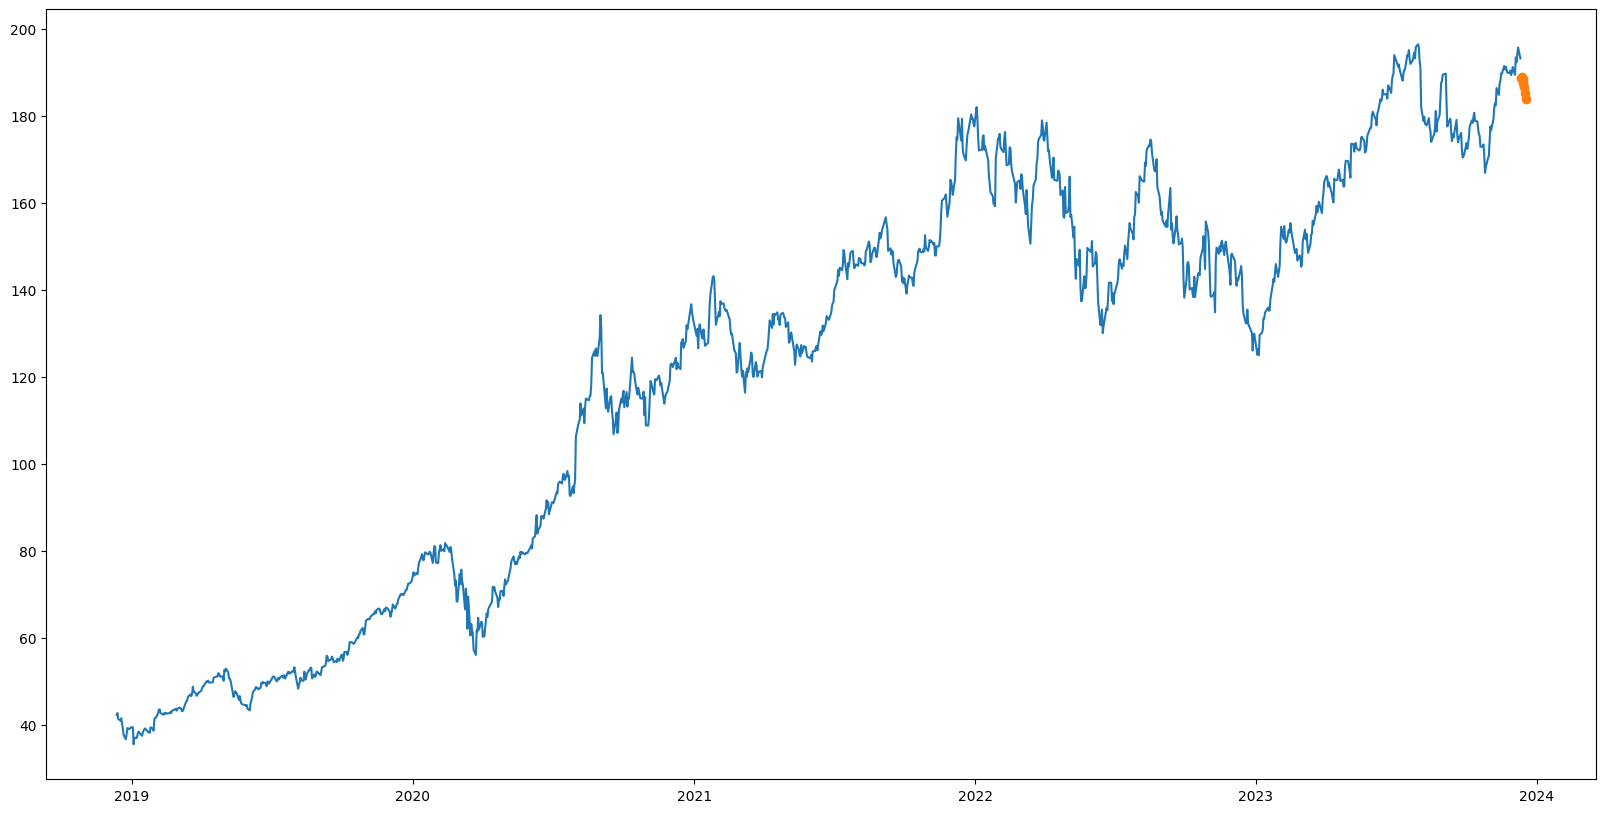

In [ ]:

plt.plot(df['Date'],scaler.inverse_transform(df1))



plt.plot(day_pred_np,scaler.inverse_transform(lst_output[:-1]),linestyle='--', marker='o',)

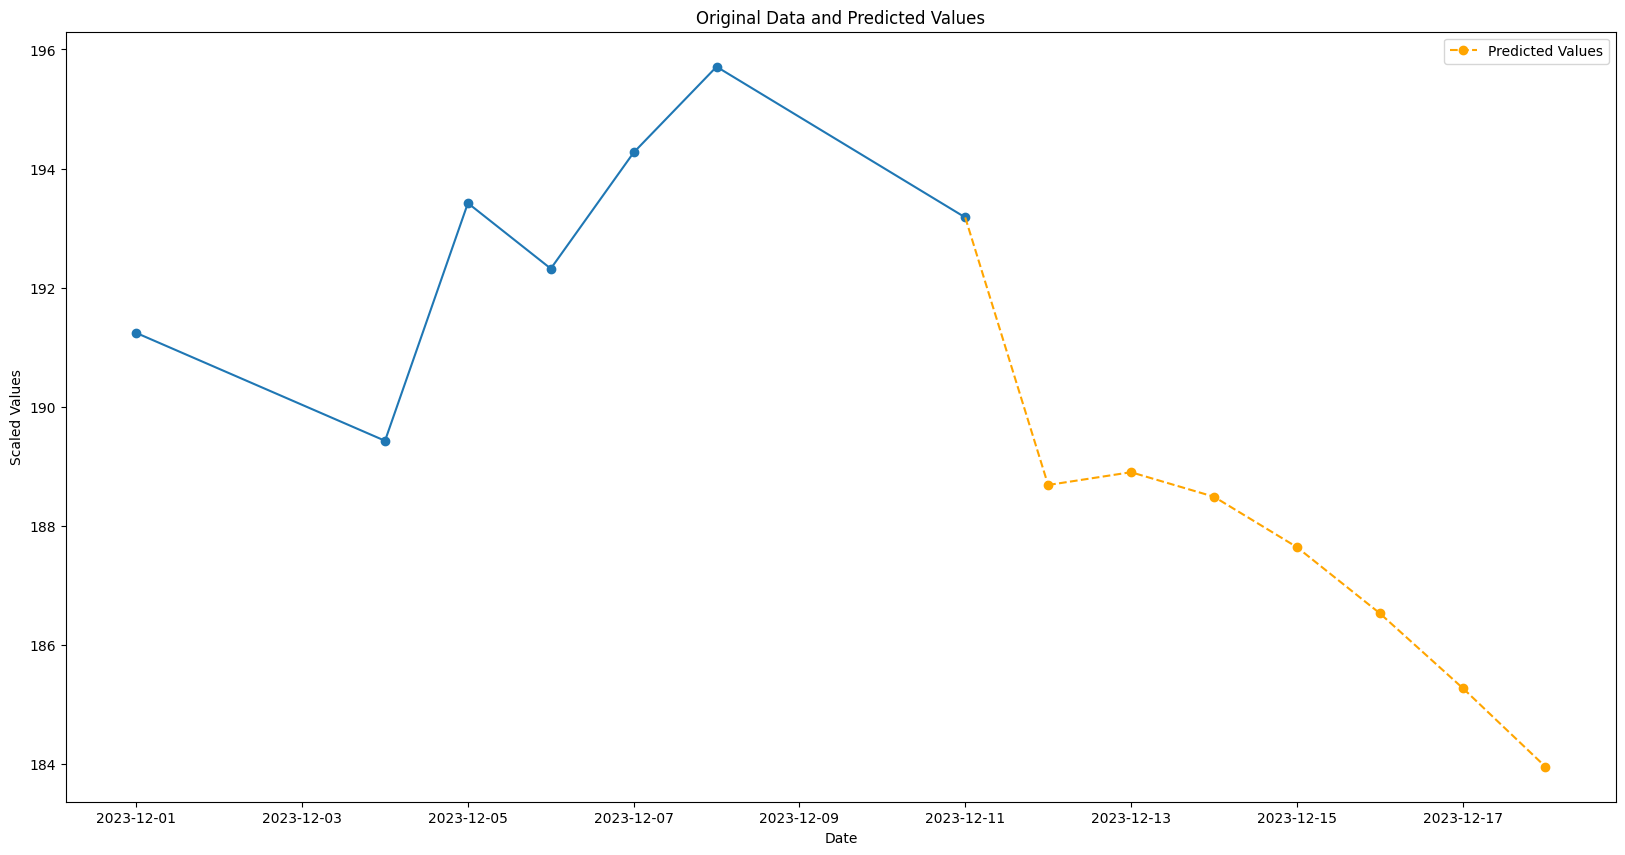

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame, scaler is your MinMaxScaler, day_pred_np is your predicted dates, and lst_output is your predicted values

# Convert lst_output to a NumPy array
lst_output_array = np.array(lst_output)

# Inverse transform the scaled predicted values
predicted_values = scaler.inverse_transform(lst_output_array[:-1].reshape(-1, 1))

# Plot the original data for the last length of predicted new dates
last_length = len(df)-len(day_pred_np)
plt.plot(df['Date'][last_length:], scaler.inverse_transform(df1)[last_length:],marker='o',)

# Plot the predicted values along with the last date
plt.plot(day_pred_np, predicted_values, linestyle='--', label='Predicted Values',marker='o', color="orange")

# Connect the last point of the first plot to the first point of the second plot with a dotted line
plt.plot([df['Date'].iloc[-1], day_pred_np[0]], [scaler.inverse_transform(df1)[-1][0], predicted_values[0][0]], linestyle='--', color="orange")

# Customize the plot
plt.title('Original Data and Predicted Values')
plt.xlabel('Date')
plt.ylabel('Scaled Values')  # Adjust the label based on your data
plt.legend()
plt.show()


In [ ]:
!pip install jupyter_dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.2 MB/s eta 0:00:00


In [ ]:
from jupyter_dash import JupyterDash
from dash import html, dcc, Input, Output
import numpy as np
import plotly.graph_objects as go

In [ ]:
def predict(num_days):
  from plotly.offline import iplot
  x_input=test_data[341:].reshape(1,-1)
  x_input.shape
  temp_input=list(x_input)
  temp_input=temp_input[0].tolist()
  lst_output=[]
  n_steps=100
  number_of_days_predicted=num_days
  i=0
  while(i<number_of_days_predicted+1):

      if(len(temp_input)>100):
          x_input=np.array(temp_input[1:])
          x_input=x_input.reshape(1,-1)
          x_input = x_input.reshape((1, n_steps, 1))
          yhat = model.predict(x_input, verbose=0)
          temp_input.extend(yhat[0].tolist())
          temp_input=temp_input[1:]
          lst_output.extend(yhat.tolist())
          i=i+1
      else:
          x_input = x_input.reshape((1, n_steps,1))
          yhat = model.predict(x_input, verbose=0)
          temp_input.extend(yhat[0].tolist())
          lst_output.extend(yhat.tolist())
          i=i+1
  # Calculate the start date as 5 years ago from today
  start_date = (datetime.today() - timedelta(days=365 * 5+1 )).strftime('%Y-%m-%d')

  # Generate dates for day_new
  day_new = pd.date_range(start=start_date, periods=(365 * 5 +2 ), freq='D')

  # Generate dates for day_pred
  day_pred = pd.date_range(start=day_new[-1], periods=number_of_days_predicted, freq='D')

  day_new_np = day_new.to_numpy()
  day_pred_np = day_pred.to_numpy()

    # Convert lst_output to a NumPy array
  lst_output_array = np.array(lst_output)

    # Inverse transform the scaled predicted values
  predicted_values = scaler.inverse_transform(lst_output_array[:-1].reshape(-1, 1))
  predicted_values_list = predicted_values.ravel().tolist()
    # Create a plotly figure
  figure = go.Figure()

  # Plot the original data for the last length of predicted new dates
  last_length = len(df) - len(day_pred_np)
  figure.add_trace(go.Scatter(
        x=df['Date'][last_length:],
        y=scaler.inverse_transform(df1)[last_length:].flatten(),
        mode='lines+markers',
        name='Original Data',
        marker=dict(color='blue')
    ))

    # Plot the predicted values along with the last date
  figure.add_trace(go.Scatter(
        x=day_pred_np,
        y=predicted_values_list,
        mode='lines+markers',
        name='Predicted Values',
        line=dict(dash='dash'),
        marker=dict(color='orange')
    ))
  y_values=scaler.inverse_transform(df1)[-1][0].ravel().tolist()

  y_values.append(predicted_values_list[0])
  y_values=np.array(y_values).flatten()
  timestamp = df['Date'].iloc[-1]

# Convert Timestamp to string
  date_string = timestamp.strftime('%Y-%m-%d')
  date = pd.to_datetime(day_pred_np[0])

  x_values = [date_string,date.strftime('%Y-%m-%d') ];


    # Connect the last point of the first plot to the first point of the second plot with a dotted line
  figure.add_trace(go.Scatter(
        x=x_values,
        y=y_values,
        mode='lines',
        line=dict(dash='dash'),
        marker=dict(color='orange'),
        showlegend=False
    ))
  title =""
  if(number_of_days_predicted == 7):
    title = "Week's Stock Prediction"
  if(number_of_days_predicted == 30):
    title = "Month's Stock Prediction"
  if(number_of_days_predicted == 365):
    title = "Year's Stock Prediction"
    # Customize the layout
  figure.update_layout(
        title=title,
        xaxis_title='Date',
        yaxis_title='Stosks in Dollars($)',
        legend=dict(x=0, y=1, traceorder='normal', orientation='h'),
        showlegend=True
    )
  return figure

# Example usage
# predict(num_days=365)


In [ ]:
predict(7)


In [ ]:
def predict_tomorrow():
  from plotly.offline import iplot
  x_input=test_data[341:].reshape(1,-1)
  x_input.shape
  temp_input=list(x_input)
  temp_input=temp_input[0].tolist()
  lst_output=[]
  n_steps=100
  number_of_days_predicted=0
  i=0
  while(i<number_of_days_predicted+1):

      if(len(temp_input)>100):
          x_input=np.array(temp_input[1:])
          x_input=x_input.reshape(1,-1)
          x_input = x_input.reshape((1, n_steps, 1))
          yhat = model.predict(x_input, verbose=0)
          temp_input.extend(yhat[0].tolist())
          temp_input=temp_input[1:]
          lst_output.extend(yhat.tolist())
          i=i+1
      else:
          x_input = x_input.reshape((1, n_steps,1))
          yhat = model.predict(x_input, verbose=0)
          temp_input.extend(yhat[0].tolist())
          lst_output.extend(yhat.tolist())
          i=i+1
  return scaler.inverse_transform(lst_output).flatten()



In [ ]:

todaystock = str( round(scaler.inverse_transform(df1)[-1][0].ravel().tolist()[0], 2))
print(todaystock)


193.18


In [ ]:
t=np.array(predict_tomorrow())
tomstock = str(round(t[0],2))
print(tomstock)

188.69


In [ ]:
todaydate = (datetime.today()- timedelta(days=1)).strftime('%Y-%m-%d')
tomdate = (datetime.today()).strftime('%Y-%m-%d')
todaydate = (datetime.today()- timedelta(days=1)).strftime('%Y-%m-%d')
tomdate = (datetime.today()).strftime('%Y-%m-%d')

In [ ]:


# Create a JupyterDash app
app = JupyterDash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Apple Stocks Prediction"),
    html.H4("Today's Date: " + todaydate + "                          Today's Stock: " + todaystock),
    html.H4("Tomorrow's Date: " + tomdate + "                          Tomorrow's Stock: " + tomstock),

    # Dropdown to select a function
    dcc.Dropdown(
        id='function-dropdown',
        options=[
            {'label': 'Week', 'value': '7'},
            {'label': 'Month', 'value': '30'},
            {'label': 'Year', 'value': '365'}
        ],
        value='7',  # Default selection
        style={'width': '50%'}
    ),

    # Graph to display the selected function
    dcc.Graph(id='function-plot')
])

# Define callback to update the plot based on the selected function
@app.callback(
    Output('function-plot', 'figure'),
    [Input('function-dropdown', 'value')]
)



def update_plot(selected_function):
    figure = go.Figure()
    # Generate y values based on the selected function
    if selected_function == '7':
          return predict(7)
    elif selected_function == '30':
          return predict(30)
    elif selected_function == '365':
          return predict(365)


# Run the app
app.run_server(host="127.0.0.1", port=8035)


Dash app running on:


/usr/local/lib/python3.10/dist-packages/dash/dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>